<a href="https://colab.research.google.com/github/LucaswasTaken/NES-DataScience/blob/main/Aula%206/Aula_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de imagem de um conjunto de dados de linguagem gestual americana

Nesta seção, realizaremos a preparação dos dados, a criação do modelo e as etapas de treinamento do modelo que observamos na última seção utilizando um conjunto de dados diferente: imagens de mãos fazendo letras em [American Sign Language](http://www.asl.gs/).

## Objetivos

* Preparar dados de imagem para treinamento
* Criar e compilar um modelo simples para classificação de imagens
* Treinar um modelo de classificação de imagem e observar os resultados

## American Sign Language Dataset

O [alfabeto de linguagem gestual americana] (http://www.asl.gs/) contém 26 letras. Duas dessas letras (j e z) requerem movimento, portanto não estão incluídas no conjunto de dados de treinamento.  

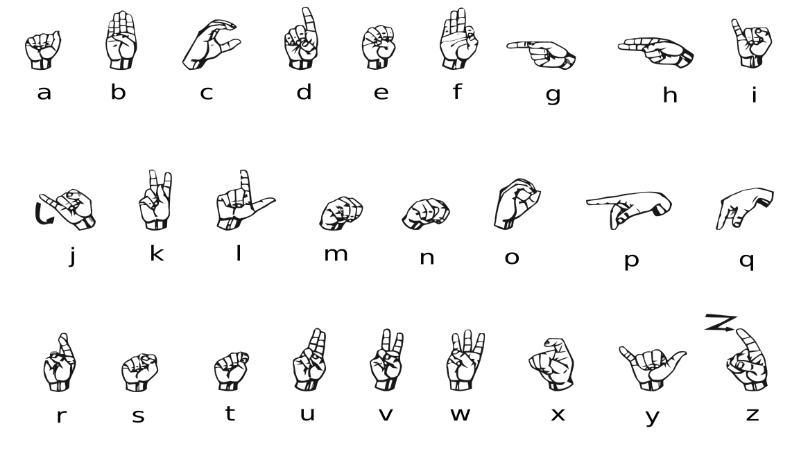

### Kaggle

Este conjunto de dados está disponível no site [Kaggle](http://www.kaggle.com), que é um lugar fantástico para encontrar conjuntos de dados e outros recursos de aprendizado profundo. Além de fornecer recursos como conjuntos de dados e "kernels" que são como estes cadernos, a Kaggle organiza competições nas quais você pode participar, competindo com outros no treinamento de modelos altamente precisos.

Se você está procurando praticar ou ver exemplos de muitos projetos de aprendizado profundo, a Kaggle é um ótimo site para visitar.

## Carregando os dados

Este conjunto de dados não está disponível via Keras da mesma forma que o MNIST, então vamos aprender como carregar dados personalizados. Ao final desta seção teremos as variáveis `x_train`, `y_train`, `x_valid`, e `y_valid` como antes.

### Leitura nos dados

O conjunto de dados de linguagem de sinais está no formato [CSV](https://en.wikipedia.org/wiki/Comma-separated_values) (Comma Separated Values), a mesma estrutura de dados por trás do Microsoft Excel e Google Sheets. É uma grade de linhas e colunas com etiquetas no topo, como visto no conjunto de dados [train](data/asl_data/sign_mnist_train.csv) e [valid](data/asl_data/sign_mnist_valid.csv) (eles podem levar um momento para carregar).

Para carregar e trabalhar com os dados, estaremos usando uma biblioteca chamada [Pandas](https://pandas.pydata.org/), que é uma ferramenta de alto desempenho para carregar e manipular dados. Vamos ler os arquivos CSV em um formato chamado [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).


In [1]:
import pandas as pd

Pandas tem um método [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) que espera um arquivo csv, e retorna um DataFrame:

In [2]:
from google.colab import files
uploaded = files.upload()


Saving sign_mnist_train.csv to sign_mnist_train.csv
Saving sign_mnist_valid.csv to sign_mnist_valid.csv


In [3]:
train_df = pd.read_csv("./sign_mnist_train.csv")
valid_df = pd.read_csv("./sign_mnist_valid.csv")

### Explorando os dados

Vamos dar uma olhada em nossos dados. Podemos usar o método [head](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) para imprimir as primeiras linhas do DataFrame. Cada linha é uma imagem que tem uma coluna 'etiqueta', e também, 784 valores que representam cada valor de pixel na imagem, assim como com o conjunto de dados MNIST. Observe que as etiquetas atualmente são valores numéricos, não letras do alfabeto:

In [4]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


### Extraindo os labels

Como no MNIST, gostaríamos de armazenar nossas etiquetas de treinamento e validação em variáveis `y_train` e `y_valid`. Aqui nós criamos essas variáveis e depois apagamos as etiquetas de nossos dataframes originais, onde elas não são mais necessárias:

In [5]:
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

### Extraindo as imagens

Como no MNIST, gostaríamos de armazenar nossas imagens de treinamento e validação em variáveis `x_train` e `x_valid`. Aqui nós criamos essas variáveis:

In [6]:
x_train = train_df.values
x_valid = valid_df.values

### Resumindo os dados de treinamento e validação

Agora temos 27.455 imagens com 784 pixels cada uma para treinamento...

In [7]:
x_train.shape

(27455, 784)

assim como seus respectivos rótulos:

In [8]:
y_train.shape

(27455,)

Para validação, temos 7.172 imagens...

In [9]:
x_valid.shape

(7172, 784)

e seus respectivos rótulos:

In [10]:
y_valid.shape

(7172,)

## Visualizando os dados

Para visualizar as imagens, utilizaremos novamente a biblioteca matplotlib. Não precisamos nos preocupar com os detalhes desta visualização, mas se estiver interessado, você poderá saber mais sobre [matplotlib](https://matplotlib.org/) em um momento posterior.

Note que teremos que remodelar os dados de sua forma 1D atual de 784 pixels, para uma forma 2D de 28x28 pixels para dar sentido à imagem:

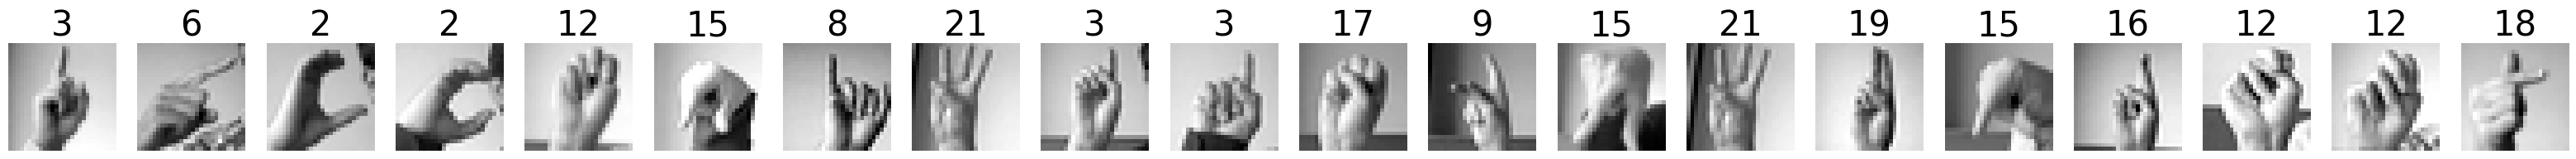

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))

num_images = 20
for i in range(num_images):
    row = x_train[i]
    label = y_train[i]

    image = row.reshape(28,28)
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

## Exercício: Normalizar os dados da imagem

Como fizemos com o conjunto de dados MNIST, vamos normalizar os dados da imagem, o que significa que seus valores de pixel, em vez de estarem entre 0 e 255 como estão atualmente:

In [12]:
x_train.min()

np.int64(0)

In [13]:
x_train.max()

np.int64(255)

devem ser valores de ponto flutuante entre 0 e 1. Use a seguinte célula para trabalhar. Se você ficar preso, olhe a solução abaixo.

In [14]:
# TODO: Normalize x_train and x_valid.

### Solução

Clique no '...' abaixo para mostrar a solução.

In [15]:
# SOLUTION
x_train = x_train / 255
x_valid = x_valid / 255

## Exercício: Categorize os rótulos

Como fizemos com o conjunto de dados MNIST, vamos codificar categoricamente as etiquetas. Lembre-se de que podemos usar o método [keras.utils.to_categorical](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical) para fazer isso, passando-lhe os valores a serem codificados, e, o número de categorias para codificá-los. Faça seu trabalho na célula abaixo. Importamos `keras` e definimos o número de categorias (24) para você.

In [16]:
import tensorflow.keras as keras
num_classes = 24

In [17]:
# TODO: Categorically encode y_train and y_valid.

### Solução

Clique no '...' abaixo para mostrar a solução.

In [18]:
# SOLUTION
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

## Exercício: Construir o Modelo

Os dados estão todos preparados, temos imagens normalizadas para treinamento e validação, assim como etiquetas categoricamente codificadas para treinamento e validação.

Para este exercício, vamos construir um modelo seqüencial. Assim como da última vez, construa um modelo que:
* Tenha uma camada de entrada densa. Esta camada deve conter 512 neurônios, utilizar a função de ativação `relu' e esperar imagens de entrada com a forma de `(784,)`
* Possui uma segunda camada densa com 512 neurônios que utiliza a função de ativação `relu'.
* Possui uma camada de saída densa com neurônios igual ao número de classes, utilizando a função de ativação `softmax'.

Faça seu trabalho na célula abaixo, criando uma variável `modelo` para armazenar o modelo. Importamos a classe do modelo Keras [Sequental](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) e a classe da camada [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) para que você possa começar. Revelar a solução abaixo para uma dica:

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
# TODO: build a model following the guidelines above.

### Solução

Clique no '...' abaixo para mostrar a solução.

In [21]:
# SOLUTION
model = Sequential()
model.add(Dense(units = 512, activation='relu', input_shape=(784,)))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Resumindo o Modelo

Execute a célula abaixo para resumir o modelo que você acabou de criar:

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 24)             │        12,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 676,888 (2.58 MB)

 Trainable params: 676,888 (2.58 MB)

 Non-trainable params: 0 (0.00 B)

## Compilando o modelo

Vamos [compilar](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#compile) nosso modelo com as mesmas opções que antes, usando [cross-entropy categórica](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) para refletir o fato de que queremos nos encaixar em uma das muitas categorias, e medir a precisão de nosso modelo:

In [23]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

## Exercício: Treinar o modelo

Utilize o método `fit' do modelo para treiná-lo durante 20 épocas utilizando as imagens e rótulos de treinamento e validação criados acima:

In [24]:
# TODO: Train the model for 20 epochs.

### Solução

Clique no '...' abaixo para mostrar a solução.

In [25]:
# SOLUTION
model.fit(x_train, y_train, epochs=20, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.2446 - loss: 2.4864 - val_accuracy: 0.5351 - val_loss: 1.3955
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.6334 - loss: 1.0887 - val_accuracy: 0.6160 - val_loss: 1.3765
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7781 - loss: 0.6571 - val_accuracy: 0.6537 - val_loss: 1.1657
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8587 - loss: 0.4242 - val_accuracy: 0.7804 - val_loss: 0.8055
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9063 - loss: 0.3196 - val_accuracy: 0.7338 - val_loss: 1.1705
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9292 - loss: 0.2504 - val_accuracy: 0.8052 - val_loss: 0.8780
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9471 - loss: 0.2005 - val_accuracy: 0.8509 - val_loss: 0.7858
Epoch 8/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9563 - loss: 0.1892 - v

## Discussão: O que aconteceu?

Podemos ver que a precisão do treinamento chegou a um nível bastante alto, mas a precisão da validação não foi tão alta. O que aconteceu aqui?

Pense um pouco antes de clicar no '...' abaixo para revelar a resposta.

`# SOLUTION`
This is an example of the model learning to categorize the training data, but performing poorly against new data that it has not been trained on. Essentially, it is memorizing the dataset, but not gaining a robust and general understanding of the problem. This is a common issue called *overfitting*. We will discuss overfitting in the next two lectures, as well as some ways to address it.

## Resumo

Nesta seção você construiu sua própria rede neural para realizar uma classificação de imagem que é bastante precisa. Parabéns!

Neste ponto, devemos estar nos familiarizando um pouco com o processo de carregamento de dados (incluindo etiquetas), preparando-o, criando um modelo, e depois treinando o modelo com dados preparados.

### Limpar a memória
Antes de prosseguir, por favor, execute a seguinte célula para limpar a memória da GPU. Isto é necessário para passar para o próximo bloco de notas.

In [26]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

## Próximo

Agora que você construiu alguns modelos muito básicos, um pouco eficazes, começaremos a aprender sobre modelos mais sofisticados, incluindo *Redes Neuronais Evolutivas*.

<center><a href="https://www.nvidia.com/dli"> <img src="images/DLI_Header.png" alt="Header" style="width: 400px;"/> </a></center>